# Classification
This notebook demonstrates classification techniques using a dataset from Kaggle. Models include Logistic Regression and KNN with different parameters.

## Step 1: Import Dataset
Please download the dataset from Kaggle and upload it to this notebook. For example, you can go to the [Iris Species Dataset](https://www.kaggle.com/uciml/iris).

If you are using Kaggle there is no such a need, and the notebook runs smoothly.

In [1]:
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Get all unique values from the 'Species' column
all_species_values = df['Species'].unique()

# Print all the values
print(all_species_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


As you can see there are three category in the target variable. Therefore, we have a multiple classification problem and the number of classes is 3.

## Step 2: Data Preprocessing
We will preprocess the data and split it into training and test sets. In the first step, we transform the labels into a numerical representation.

In [3]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Encoding target labels
le = LabelEncoder()
df['Species_Number'] = le.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Number
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


We only considers two features at first.

In [24]:
from sklearn.model_selection import train_test_split

# Determining features and Target variable
# Only using two features
features = ['SepalLengthCm', 'SepalWidthCm']
target = 'Species_Number'
X = df[features]
y = df[target]

# Splitting the dataset to train and test sets (30% test and 70% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3 : Logistic Regression
In this step, we train a Logistic Regression model with two of our selected features.

In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Calulating probabilities
probs = logreg.predict_proba(X_test)

# Printing the first and second observation in test set probablities
print("Predicted Probabilities for the first and the second observation in test set:")
print("______________________________________________________________\n")
print("1st: \n")
print(probs[0])
print("______________________________________________________________\n")
print("2nd: \n")
print(probs[1])

Predicted Probabilities for the first and the second observation in test set:
______________________________________________________________

1st: 

[0.02599118 0.53482454 0.43918428]
______________________________________________________________

2nd: 

[0.69309377 0.11786614 0.18904009]


There are three numbers which corresponds to each class. (Recall that there are 3 classes)

A visualization of the model performance can be seen by runing the below code. It will produce a confusion matrix.

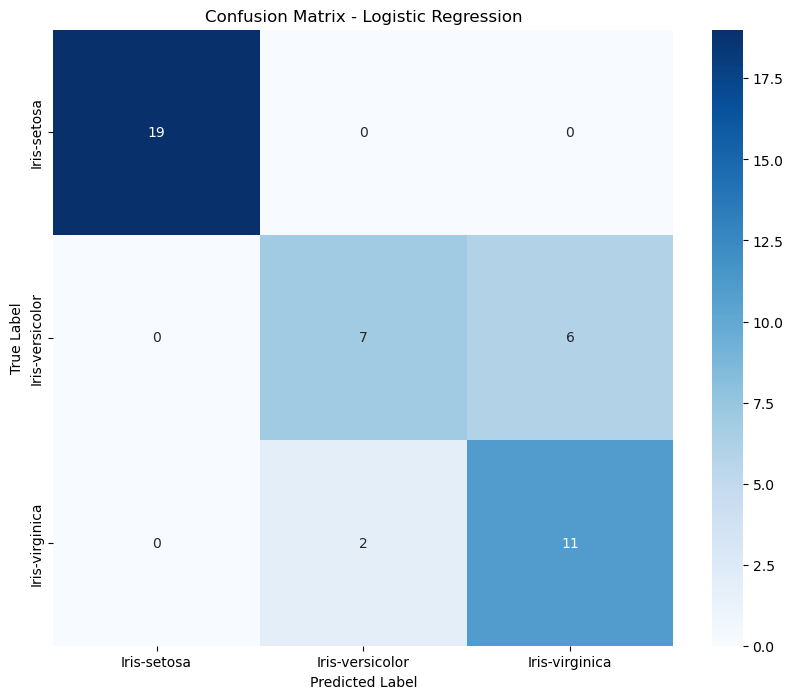

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

There are some misclassifications beacuse our model is simple and only uses two features.

### Logistic Regression with full set of features
In this step, we train a Logistic Regression model with full set of features. We will observe considerable improvement in the performance of the model.

In [32]:
# Determining features and Target variable
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = 'Species_Number'
X = df[features]
y = df[target]

# Splitting the dataset to train and test sets (30% test and 70% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Training the model

In [33]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=43)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Calulating probabilities
probs = logreg.predict_proba(X_test)

# Printing the first and second observation in test set probablities
print("Predicted Probabilities for the first and the second observation in test set:")
print("______________________________________________________________\n")
print("1st: \n")
print(probs[0])
print("______________________________________________________________\n")
print("2nd: \n")
print(probs[1])

Predicted Probabilities for the first and the second observation in test set:
______________________________________________________________

1st: 

[9.65735102e-01 3.42646941e-02 2.03980375e-07]
______________________________________________________________

2nd: 

[9.79390225e-01 2.06097145e-02 6.04866661e-08]


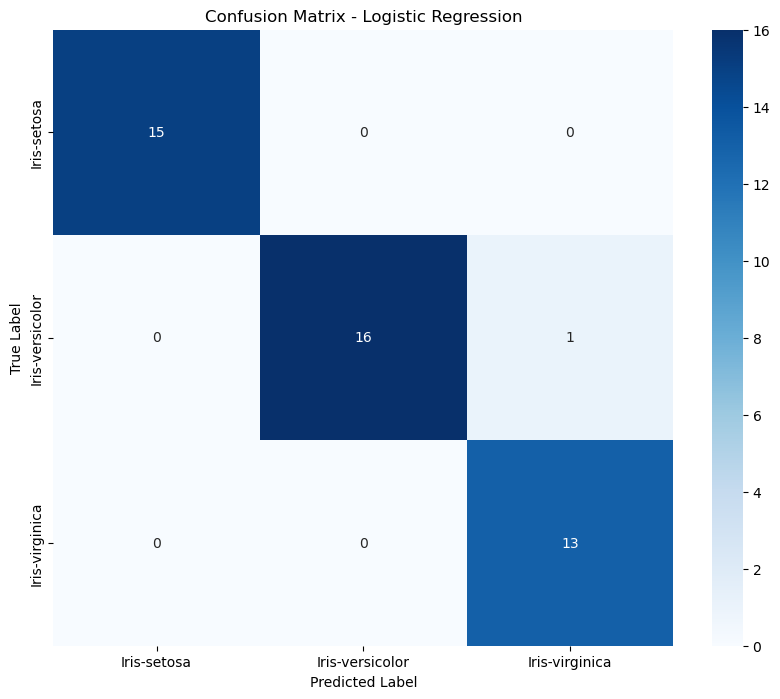

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model performance is exceptional as it classifies nearly all the test observations correctly.

## Step 4: KNN Classifier
For the second model we will implement the KNN model using k=3.

In [46]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Number of neighbors = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Create a DataFrame to show predicted and actual labels
results_df = pd.DataFrame({'Predicted Label': y_pred_knn,
                           'Actual Label': y_test})

# Print the DataFrame
print("\nDataFrame of Predicted vs. Actual Labels:")
results_df


DataFrame of Predicted vs. Actual Labels:


,Predicted Label,Actual Label
30,0,0
0,0,0
138,2,2
67,1,1
105,2,2
39,0,0
113,2,2
71,1,1
81,1,1
57,1,1


Based on the predictions, the model performance is considered great; no missclassification.

In [47]:
# Accuracy of the model
accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 1.0


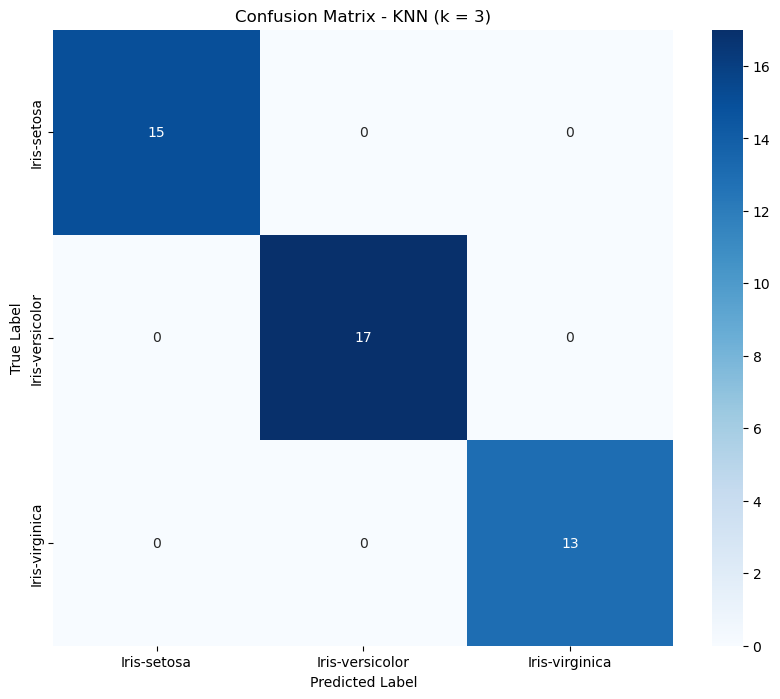

In [48]:
# Create confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (k = 3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

As you can see, both models are doing well with the full set of features.